In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
#imported the libraries im going to need

In [34]:
"""
in this exemple we are trying to predict the house price based on some other variables, 
for that i used the boston housing price dataset
"""
#imported the dataset im going to use, you can find it in the datasets folder
df = pd.read_csv('C:/Users/mobidata/Desktop/project/Classeur1.csv', delim_whitespace= True, decimal='.', header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
"""
    1. CRIM      the crime rate by town
    2. ZN        proportion of residential land zoned
    3. INDUS     proportion of non-retail business acres per town (industrial zone)
    4. CHAS      (= 1 if close to the river tracts ; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms
    7. AGE       age of the buildings
    8. DIS       weighted distances to five Boston employment centres (close to the center or not)
    9. RAD       index of accessibility to radial highways
    10. TAX      taxes in the town
    11. PTRATIO  student/teacher ratio by town (the less it is the better)
    12. B        the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median house price"""

'\n    1. CRIM      the crime rate by town\n    2. ZN        proportion of residential land zoned\n    3. INDUS     proportion of non-retail business acres per town (industrial zone)\n    4. CHAS      (= 1 if close to the river tracts ; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms\n    7. AGE       age of the buildings\n    8. DIS       weighted distances to five Boston employment centres (close to the center or not)\n    9. RAD       index of accessibility to radial highways\n    10. TAX      taxes in the town\n    11. PTRATIO  student/teacher ratio by town (the less it is the better)\n    12. B        the proportion of blacks by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median house price'

In [4]:
#at first, we didn't have column names, now we give names to the columns
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [5]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape#to know the shape of the dataset we have

(506, 14)

In [7]:
df.isnull().sum()#to see if there is any NAN values in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## exploratory data analysis (EDA)

In [8]:
df.describe()#this function return a dataframe with descriptive statistics on our dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


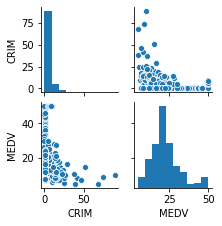

In [9]:
sn.pairplot(df[['CRIM','MEDV']],height = 1.5)#this is a famous seaborn function, it's very used in EDA, the attribut height is for the size of the plot
plt.show()

In [24]:
#the less the crime rate by town is the more the price is

In [10]:
df.corr()#this function is used to spot the highest correlations between variables, if you don't understand the correlation topic i suggest you read about it before carrying on the code

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


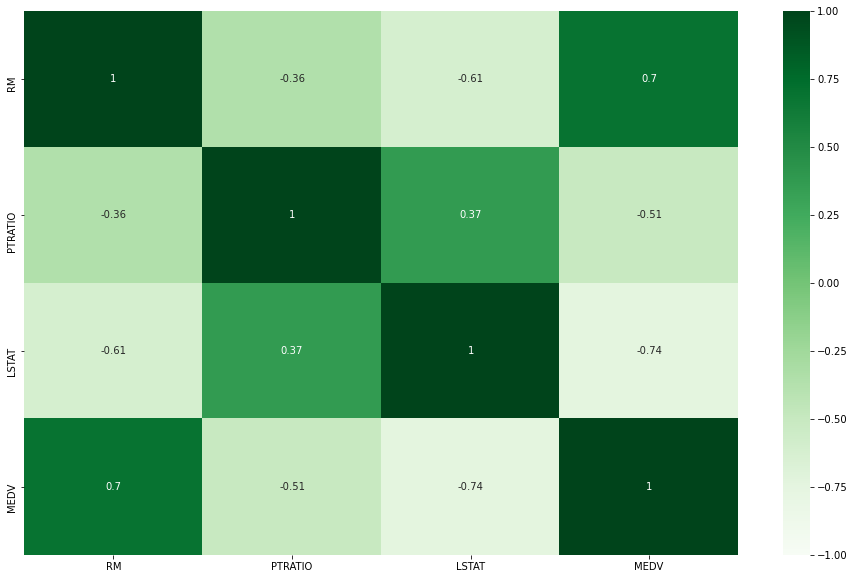

In [16]:
plt.figure(figsize=(16,10))#we creat a figure and specify its size
sn.heatmap(df[['RM','PTRATIO','LSTAT','MEDV']].corr(),vmin=-1,cmap='Greens',annot=True)#the heatmap is a figure that makes EDA very easy, by coloring the cells from light to bold, based on the value of the cell, the annot attribut is to show the values of the cell
plt.show()#to show the figure

In [17]:
#time to creat the simple linear regression model model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.RM, df.MEDV,test_size = 0.2)#as we saw in decision tree example, this function splits the data
#here we split the model into 80% to train the model and 20% to test the accuracy of the model

Text(0.5, 1.0, 'test training split')

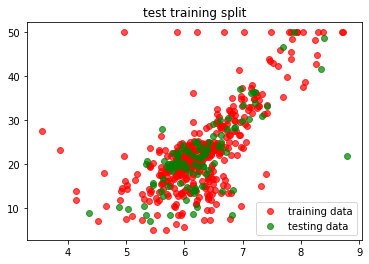

In [21]:
#visualization
#sometimes you are going to see me using plt.scatter and sometimes i use plt.plot, the difference between them is that scatter does not tie the elements, nut plot does, so i use plot when i want to plot lines and scatter when i want to plot elements
plt.scatter(X_train,y_train, label='training data', color = 'r', alpha = 0.7)#i plot the training data, the attribut alpha is used to specify the opacity of the points
plt.scatter(X_test,y_test, label='testing data', color = 'g', alpha = 0.7)#i plot the testing data
plt.legend()#to sho the plot key
plt.title('test training split')#give the figure a title

In [22]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train.values)#we fit the model into the data we have (train the model)
#must mention that if you don't use the reshape function it will fire an error, because the fit function takes a one column shape serie

LinearRegression()

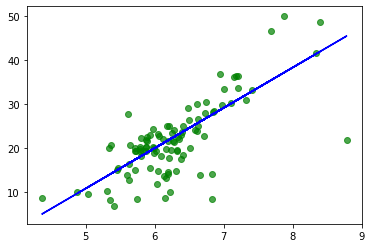

In [23]:
#use the model to predect
prediction = model.predict(X_test.values.reshape(-1,1))#do some predictions, with the test values
#plot the result
plt.plot(X_test,prediction,label = 'linear regression', color = 'b')#we use plot to perform a line, and that's the line of the linear regression
plt.scatter(X_test,y_test,label = 'actual data', color = 'g', alpha = 0.7)#and scatter to perform points
plt.show()

In [24]:
#specific prediction
model.predict(np.array([[20]]))[0]#this predict function returns an array, but we are interested in the first value of this array, it's the value we are looking for

148.17725557475123

In [33]:
#we found if a house has 20 rooms the price will be 144.59 *1000$

In [26]:
#now we should score the accuracy of our model
#model score return R**2, if you are not familiar with r**2, it is a statistical term, you should read about it
model.score(X_test.values.reshape(-1,1), y_test.values)#we compare the results of the predictions with the actual values

0.53966989628354

In [28]:
"""this score means that the price of the house is around 54% dependent to the number of rooms 
which is important because the other 46% is obviously shared between other factors so this factor may be the one with 
the highest impact on the price
"""

'this score means that the price of the house is around 54% dependent to the number of rooms \nwhich is important because the other 46% is obviously shared between other factors so this factor may be the one with \nthe highest impact on the price\n'

## MULTIPLE LINEAR REGRESSION

In [43]:
print(type(df['RM']))
print(type(df[['RM']]))
print(type(df.RM))
#i thought this may be usefull to know the difference between those notations

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [29]:
X = df.loc[:,['RM','PTRATIO','LSTAT']]#WE ARE GOING TO USE THESE THREE COLUMNS TO DO THE PREDICTION OF THE HOUSE PRICE
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)
#i choosed the factors with the highest correlation value, that means those who hase the highest impact on the price

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.predict([[15,18,2.5]])#do some random predictions

array([69.32215352])

In [32]:
model.coef_#returns the coefficients multiplying the independent variables, we have three independent variables so we are going to have three coefficients

array([ 4.68151268, -0.9626088 , -0.5411262 ])

In [54]:
model.intercept_#returns the intercept element

16.27057487569265

In [33]:
model.score(X_test, y_test)#and of course, the score will be better than the score we got with the simle linear regression model

0.6740502708663849